# Exploratory Data Analysis

Ici nous pouvons faire toutes nos analyses des données

In [4]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Je reprends ta nomenclature sur les datasets cela nous permettra de pouvoir comparer les fonctions plus facilement comment on parlera de la même chose

In [22]:
training_data_1 = pd.read_csv("Data/Initial/train.csv")
testing_data_1 = pd.read_csv("Data/Initial/test.csv")

wp_1_forecast = pd.read_csv("Data/Initial/wp1.csv")
wp_2_forecast = pd.read_csv("Data/Initial/wp2.csv")
wp_3_forecast = pd.read_csv("Data/Initial/wp3.csv")
wp_4_forecast = pd.read_csv("Data/Initial/wp4.csv")
wp_5_forecast = pd.read_csv("Data/Initial/wp5.csv")
wp_6_forecast = pd.read_csv("Data/Initial/wp6.csv")

In [3]:
wp_1_forecast.head()

,date,hors,u,v,ws,wd
0,2009070100,1,3.14,-3.62,4.79,139.09
1,2009070100,2,2.96,-3.56,4.63,140.26
2,2009070100,3,2.89,-3.46,4.51,140.15
3,2009070100,4,2.87,-3.33,4.40,139.26
4,2009070100,5,2.80,-3.19,4.25,138.73


Je fais encore quelques test pour comprendre aussi git

### Functions
J'ai repris tes fonctions pour les dates :)

In [17]:
def integer2date(s):
    s = str(s)
    return  datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]), hour=int(s[8:]))

def adding_hours(h):
    return timedelta(hours = h)

def date_conversion(df):
    df['forecast_time'] = df.date.apply(lambda x: integer2date(x))
    df['hours_added'] = df.hors.apply(lambda x: adding_hours(x))
    df['date'] = df['forecast_time'] + df['hours_added']
    df = df.drop(['hours_added', 'hors'], axis = 1)
    return df

In [13]:
def forecast_batch(df):
    """Creates a batch number feature for each 48h predicted."""
    i = 1
    for date in df.date.unique():
        df.loc[df.date == date, 'forecast'] = i
        i += 1
    return df 

def forecast_distance(df):
    """Computes the distance from the time of forecast and the date forecast. 
    The incertitude of the forecast increases with the distance"""
    df.sort_values(by = ['forecast', 'date'], inplace = True)
    for cast in df.forecast.unique():
        nb_forecast = len(df.loc[df.forecast == cast, 'date'])
        i = 0
        for date in df[df.forecast == cast].date.unique():
            df.loc[(df.forecast == cast)&(df.date == date), 'forecast_dist'] = i
            i+=1  
    return df

In [15]:
from scipy.optimize import minimize
def rmse_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = weights[0]*y_pred['xgb']+weights[1]*y_pred['lgbm']#+weights[2]*y_pred['dnn']
    

    return mean_squared_error(y_test, final_prediction)
weights = [0.5,0.5]
res = minimize(rmse_func, [0.5,0.5], method='Nelder-Mead')
print(res)

NameError: name 'y_pred' is not defined

### Skewness of WPs

J'aime l'idée de regarder la skewness des données. Je regarde celle des WP, de mémoire Sun (la N°1) avait réduit la skewness du wp1

In [4]:
for i in training_data_1.columns:
    print(training_data_1[i].skew())    

0.5093657149642632
0.8451902425489617
1.0968414562815931
1.007556231044613
0.8609311042833497
0.7835154891885409
1.0301915370685903


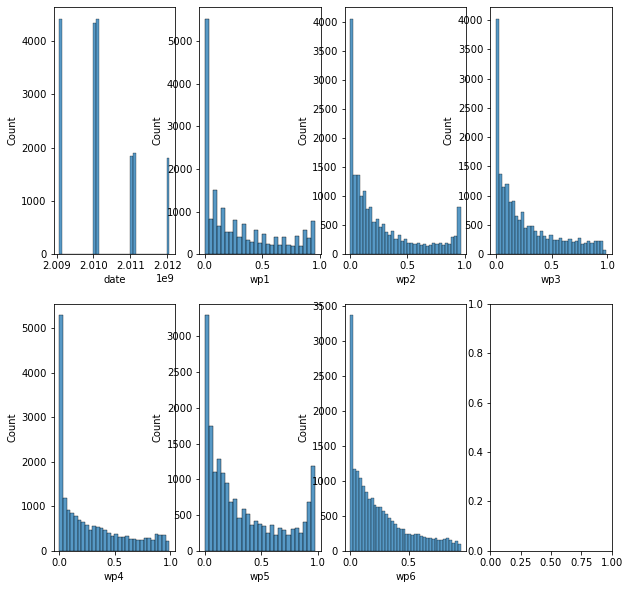

In [8]:
n_rows=2
n_cols=4

a4_dims = (10, 10)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=a4_dims)

for i, column in enumerate(training_data_1.columns):
    sns.histplot(training_data_1[column],ax=axes[i//n_cols,i%n_cols])

In [6]:
#for i in training_data_1.columns:
 #   training_data_1[str(i) + '_correted'] = np.sqrt(training_data_1[i])

In [7]:
#training_data_1.head()

### Exploration and comparison of the datasets
To explore if distribution and data structure vary by much between datasets

Je commences par les WPs

In [35]:
stats_wps = pd.DataFrame(index =[i for i in training_data_1.columns if i!= 'date'] ) 

In [36]:
stats_wps['mean'] = np.mean(training_data_1, axis=0)[1:]
stats_wps['std'] = np.std(training_data_1, axis=0)[1:]
stats_wps['variance'] = np.var(training_data_1,axis=0)[1:]
stats_wps['max'] = np.max(training_data_1,axis=0)[1:]
stats_wps['min'] = np.min(training_data_1,axis=0)[1:]

In [37]:
stats_wps.head(7)

,mean,std,variance,max,min
wp1,0.290547,0.305351,0.093239,0.960,0.0
wp2,0.272823,0.294390,0.086665,0.966,0.0
wp3,0.266294,0.273343,0.074717,0.989,0.0
wp4,0.286181,0.295224,0.087157,0.992,0.0
wp5,0.334295,0.318618,0.101517,0.978,0.0
wp6,0.252136,0.246276,0.060652,0.947,0.0


Quick and dirty sur les forecasts

In [3]:
stats_forecast = pd.DataFrame(index = [i for i in [i for i in wp_1_forecast.columns if i!='date'] if i!= 'hors'])
#stats_forecast.head()

In [4]:
datasets = [wp_1_forecast,wp_2_forecast,wp_3_forecast,wp_4_forecast,wp_5_forecast,wp_6_forecast]
#for i in range (1,7):
 #   datasets.append('wp_'+str(i)+'_forecast')

In [5]:
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_mean']=np.mean(j.iloc[:,2:],axis=0)
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_std']=np.std(j.iloc[:,2:],axis=0)
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_var']=np.var(j.iloc[:,2:],axis=0)
#for i,j in enumerate(datasets):
 #   stats_forecast['wp_'+str(i+1)+'_max']=np.max(j.iloc[:,2:],axis=0)
#for i,j in enumerate(datasets):
    #stats_forecast['wp_'+str(i+1)+'_min']=np.min(j.iloc[:,2:],axis=0)
    

In [6]:
stats_forecast.head()

,wp_1_mean,wp_2_mean,wp_3_mean,wp_4_mean,wp_5_mean,wp_6_mean,wp_1_std,wp_2_std,wp_3_std,wp_4_std,wp_5_std,wp_6_std,wp_1_var,wp_2_var,wp_3_var,wp_4_var,wp_5_var,wp_6_var
u,1.168435,1.318864,0.542813,1.220828,1.154190,1.597133,3.763357,3.182570,3.173943,3.287101,3.621983,3.056521,14.162853,10.128753,10.073917,10.805032,13.118760,9.342320
v,-0.113256,0.214509,-0.243599,-0.043790,0.030322,-0.089720,4.799884,3.440446,3.168400,3.615630,3.529343,2.871361,23.038883,11.836672,10.038758,13.072784,12.456260,8.244712
ws,5.577651,4.419870,4.064729,4.527633,4.637438,4.071236,2.732965,2.053202,1.986136,2.206976,2.324297,1.889665,7.469098,4.215640,3.944735,4.870745,5.402356,3.570835
wd,157.603322,143.115222,180.781666,152.799327,153.408561,144.820224,102.649059,99.534201,101.488463,100.063320,99.283593,93.641223,10536.829270,9907.057235,10299.908191,10012.667983,9857.231889,8768.678693


### Deviation between first and last hours of forecast

In [102]:
select_columns = wp_1_forecast[['ws','u']]
forecast_ws = select_columns.copy()
forecast_ws.head()

,ws,u
0,4.79,3.14
1,4.63,2.96
2,4.51,2.89
3,4.40,2.87
4,4.25,2.80


In [24]:
wp_1_forecast.head()

,date,u,v,ws,wd,forecast,forecast_time,forecast_dist
0,2009-07-01 01:00:00,3.14,-3.62,4.79,139.09,1.0,2009-07-01,0.0
1,2009-07-01 02:00:00,2.96,-3.56,4.63,140.26,1.0,2009-07-01,1.0
2,2009-07-01 03:00:00,2.89,-3.46,4.51,140.15,1.0,2009-07-01,2.0
3,2009-07-01 04:00:00,2.87,-3.33,4.40,139.26,1.0,2009-07-01,3.0
4,2009-07-01 05:00:00,2.80,-3.19,4.25,138.73,1.0,2009-07-01,4.0


In [23]:
wp_1_forecast = forecast_batch(wp_1_forecast)
wp_1_forecast = date_conversion(wp_1_forecast)
wp_1_forecast = forecast_distance(wp_1_forecast)

In [103]:
data_12H = wp_1_forecast[wp_1_forecast['forecast_dist']== 11].set_index('date').drop(['forecast_time','forecast_dist','forecast'],axis=1)
data_48H = wp_1_forecast[wp_1_forecast['forecast_dist']== 47].set_index('date').drop(['forecast_time','forecast_dist','forecast'],axis=1)

data_merge = data_12H.merge(data_48H,how='inner',left_index=True,right_index=True, suffixes=('_12h','_48h')).dropna(how='any')
data_merge.columns

Index(['u_12h', 'v_12h', 'ws_12h', 'wd_12h', 'u_48h', 'v_48h', 'ws_48h',
       'wd_48h'],
      dtype='object')

In [110]:
data_merge['wd_12h_sin'] = np.sin((data_merge['wd_12h']*3.14)/180)
data_merge['wd_48h_sin'] = np.sin((data_merge['wd_48h']*3.14)/180)
data_merge['wd_12h_cos'] = np.cos((data_merge['wd_12h']*3.14)/180)
data_merge['wd_48h_cos'] = np.cos((data_merge['wd_48h']*3.14)/180)

In [111]:
data_merge.columns

Index(['u_12h', 'v_12h', 'ws_12h', 'wd_12h', 'u_48h', 'v_48h', 'ws_48h',
       'wd_48h', 'wd_12h_sin', 'wd_48h_sin', 'wd_12h_cos', 'wd_48h_cos'],
      dtype='object')

In [104]:
np.var((data_merge['ws_12h']/data_merge['ws_48h']))

1.0212457657735492

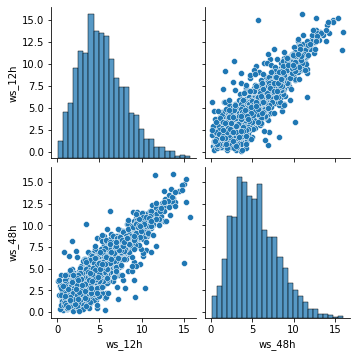

In [105]:
sns.pairplot(data_merge[['ws_12h','ws_48h']])

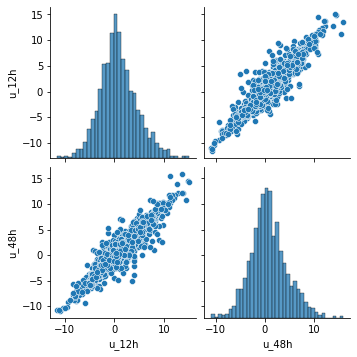

In [107]:
sns.pairplot(data_merge[['u_12h','u_48h']])

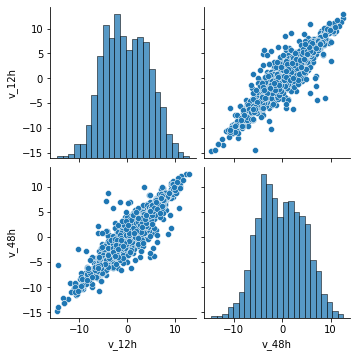

In [108]:
sns.pairplot(data_merge[['v_12h','v_48h']])

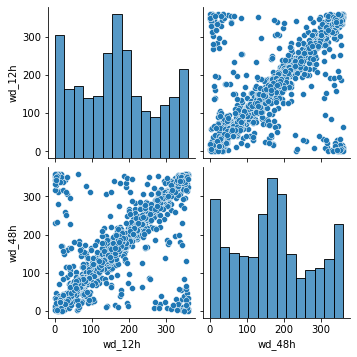

In [109]:
sns.pairplot(data_merge[['wd_12h','wd_48h']])

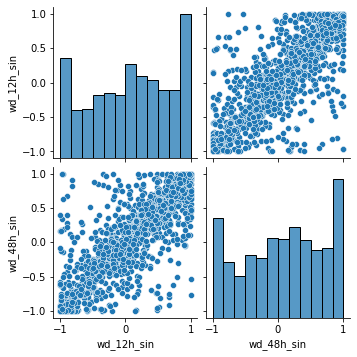

In [112]:
sns.pairplot(data_merge[['wd_12h_sin','wd_48h_sin']])

# EDA on preprocess

In [5]:
train_wp1 = pd.read_csv('Data/Preprocessing/WP1_train_preprocessed.csv', sep=',')
train_wp2 = pd.read_csv('Data/Preprocessing/WP2_train_preprocessed.csv', sep=',')
train_wp3 = pd.read_csv('Data/Preprocessing/WP3_train_preprocessed.csv', sep=',')
train_wp4 = pd.read_csv('Data/Preprocessing/WP4_train_preprocessed.csv', sep=',')
train_wp5 = pd.read_csv('Data/Preprocessing/WP5_train_preprocessed.csv', sep=',')
train_wp6 = pd.read_csv('Data/Preprocessing/WP6_train_preprocessed.csv', sep=',')

In [6]:
test_wp1 = pd.read_csv('Data/Preprocessing/WP1_test_preprocessed.csv', sep=',')
test_wp2 = pd.read_csv('Data/Preprocessing/WP2_test_preprocessed.csv', sep=',')
test_wp3 = pd.read_csv('Data/Preprocessing/WP3_test_preprocessed.csv', sep=',')
test_wp4 = pd.read_csv('Data/Preprocessing/WP4_test_preprocessed.csv', sep=',')
test_wp5 = pd.read_csv('Data/Preprocessing/WP5_test_preprocessed.csv', sep=',')
test_wp6 = pd.read_csv('Data/Preprocessing/WP6_test_preprocessed.csv', sep=',')
test_dates = pd.read_csv('Data/Initial/test.csv', sep=',').date.values

In [7]:
to_drop = ['date','wd','forecast_time', 'forecast', "forecast_dist"]

In [8]:
#(test_wp1['ws'].isnull().sum())/len(test_wp1)

In [9]:
#len(test_wp1)

In [10]:
#len(train_wp1)/84

In [11]:
wp1_X = train_wp1[[c for c in train_wp1 if c not in ["wp"]] + ["wp"]].drop(to_drop, axis = 1)

In [12]:
#new_train = np.array_split(wp1_X.iloc[:,:-1],624)

In [13]:
#new_train_y=np.array_split(wp1_X.iloc[:,-1],624)

In [14]:
#new_train_y[0]

In [15]:
from lightgbm import LGBMRegressor

In [16]:
model = LGBMRegressor()

In [17]:
#train = pd.DataFrame()
#val=pd.DataFrame()
#for i in range(0,624):
#    if i%4 ==0:
#        val = pd.concat([val,new_train[i]])
#    else:
#        train=pd.concat([train,new_train[i]])
    

In [18]:
#train_y, val_y = np.reshape(train_y,(len(train_y),)), np.reshape(val_y,(len(val_y),))

In [19]:
#np.shape(train_y)

In [20]:
#model.fit(train,train_y)

In [21]:
#np.shape(val_y),np.shape(val)

In [22]:
#y_pred = model.predict(val)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
#print('MAE:',mean_absolute_error(y_pred,val_y),'RMSE:',mean_squared_error(y_pred,val_y,squared=False))

In [25]:
def hyperparametrization(trial, train_x, test_x, train_y, test_y):
    param = {
        'metric': 'rmse', 
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'max_depth': trial.suggest_int("max_depth", 20, 100),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
    }
    
#     model = LGBMRegressor(**param)  
    model = Pipeline([('scaler', MinMaxScaler()),('ridge', LGBMRegressor(**param))])
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    model.fit(train_x,train_y)
    
    preds = model.predict(test_x)
    
    #rmse =  mean_squared_error(test_y, preds,squared=False)
    mae = mean_absolute_error(test_y,preds)
    return mae #rmse

In [26]:
def create_dataset(data,n):
    n_batch=int(len(data)/84)
    new_data=np.array_split(data,n_batch)
    train = pd.DataFrame()
    val=pd.DataFrame()
    for i in range(0,624):
        if (i+n)%10 ==0:
            val = pd.concat([val,new_data[i]])
        else:
            train=pd.concat([train,new_data[i]])
    return train,val

In [39]:
def hyperparametrization_cv(trial, x,y):
    param = {
        'metric': 'rmse', 
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'max_depth': trial.suggest_int("max_depth", 20, 100),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
    }
    
#     model = LGBMRegressor(**param)  
    model = Pipeline([('scaler', MinMaxScaler()),('ridge', LGBMRegressor(**param))])
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    split=10
    rmse=[]
    mae=[]
    for n in range(split):
        train_x,test_x=create_dataset(x,n)
        train_y,test_y=create_dataset(y,n)
        model.fit(train_x,train_y.values.ravel())
        preds=model.predict(test_x)
    
        mae.append(mean_absolute_error(test_y, preds))
        rmse.append(mean_squared_error(test_y, preds,squared=False))
    
    #rmse =  mean_squared_error(test_y, preds,squared=False)
    #mae = mean_absolute_error(test_y,preds)
    return np.mean(mae) #rmse

In [28]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna

In [29]:
X1 = wp1_X.drop('wp', axis=1)
y1 = wp1_X['wp']

In [156]:
def objective_wp1(trial,train_x=train, test_x=val, train_y=train_y.values.ravel(), test_y=val_y.values.ravel()):
    #train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    return hyperparametrization(trial, train_x, test_x, train_y, test_y)

In [36]:
def objective_wp1_cv(trial,x=X1,y=y1):
    return hyperparametrization_cv(trial,x,y)

In [38]:
test = [2,8]
np.mean(test)

5.0

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_wp1_cv, n_trials=50)
#write_results('Data/Hyperparametrization/lgbm_vmd_50trials_cv.xlsx', 'wp1', study.trials_dataframe())
best_trial = study.best_trial.params
best_trial

[I 2021-09-19 17:26:53,172] A new study created in memory with name: no-name-bc18156a-70af-43e6-bd19-ffa3330becc0
[I 2021-09-19 17:33:53,335] Trial 0 finished with value: 0.07103760316670554 and parameters: {'reg_alpha': 0.015512758069466195, 'reg_lambda': 0.002844988554239606, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.08096329117982046, 'max_depth': 39, 'num_leaves': 520, 'min_child_samples': 67}. Best is trial 0 with value: 0.07103760316670554.
[I 2021-09-19 17:39:56,555] Trial 1 finished with value: 0.07347638348236088 and parameters: {'reg_alpha': 0.0034506225700420634, 'reg_lambda': 0.01260438101514434, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.15012055757108556, 'max_depth': 86, 'num_leaves': 744, 'min_child_samples': 227}. Best is trial 0 with value: 0.07103760316670554.
[I 2021-09-19 17:55:27,968] Trial 2 finished with value: 0.2113282930924892 and parameters: {'reg_alpha': 0.006763639701135466, 'reg_lambda': 0.013464490832418597, 'colsam